# Preview Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Train.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
real_stock_data = train_df.iloc[:, 1:2].values

# Scale Data

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
real_stock_data_scaled = scaler.fit_transform(real_stock_data)

In [5]:
real_stock_data_scaled.shape

(1258, 1)

In [6]:
X_train = real_stock_data_scaled[0:1257]
y_train = real_stock_data_scaled[1:1258]

In [7]:
X_train = np.reshape(X_train, (1257, 1, 1))

# RNN Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [9]:
rnn_regressor = Sequential()

rnn_regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(1,1)))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(Dense(units=1))

rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
rnn_regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6114
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4775
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.3795
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.3000
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2344
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1873
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1560
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1285
Epoch 9/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1140
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0962
Epoch 11/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0895
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0865
Epoch 13/100
40/40 [=================

# Model Result on Train Data

In [11]:
predicted_stock_data = rnn_regressor.predict(X_train)
predicted_stock_data = scaler.inverse_transform(predicted_stock_data)

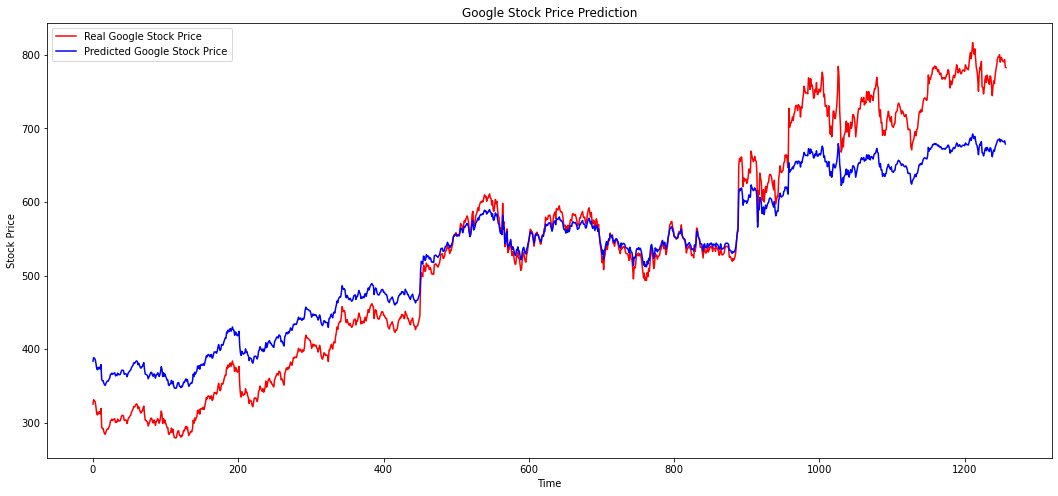

In [12]:
plt.figure(figsize=(18,8))

plt.plot(real_stock_data, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_data, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model Result on Test Data

In [13]:
test_df = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
real_stock_test_data = test_df.iloc[:, 1:2].values

In [15]:
X_test = scaler.fit_transform(real_stock_test_data)
X_test = np.reshape(X_test, (20, 1, 1))

In [16]:
predicted_stock_test_data = rnn_regressor.predict(X_test)
predicted_stock_test_data = scaler.inverse_transform(predicted_stock_test_data)

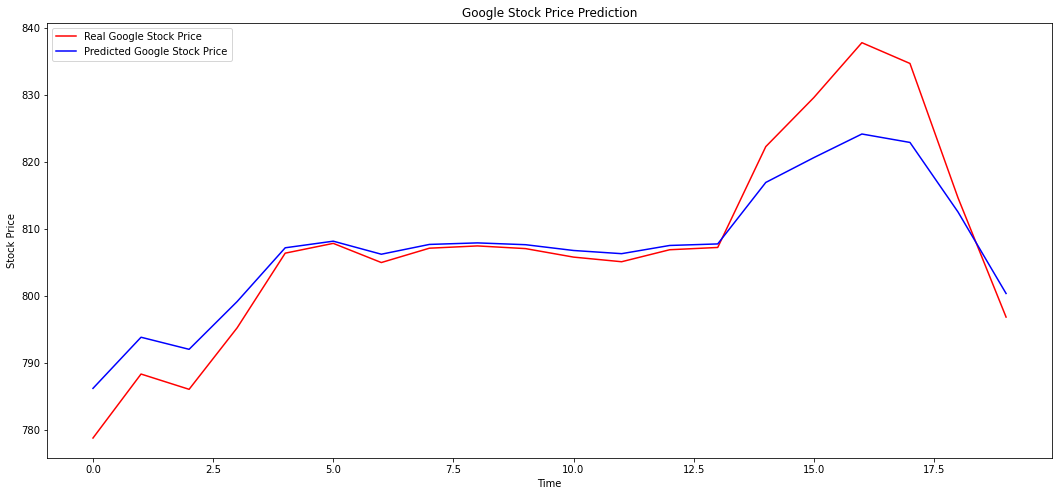

In [17]:
plt.figure(figsize=(18,8))

plt.plot(real_stock_test_data, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_test_data, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()